<a href="https://colab.research.google.com/github/ultimatecrack/Projects/blob/master/Mask%20Detector/Transfer_Learning_with_data_agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

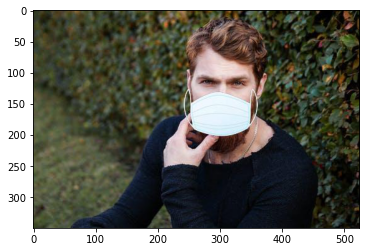

In [ ]:
#Check an image
plt.imshow(image.load_img('/practice/custom object detector/dataset/train/with_mask/0-with-mask.jpg'))
plt.show()

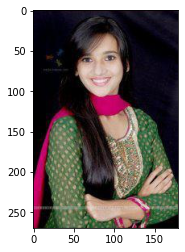

In [ ]:
plt.imshow(image.load_img('/practice/custom object detector/dataset/train/without_mask/0.jpg'))
plt.show()

In [ ]:
train_path = "/practice/custom object detector/dataset/train"
valid_path = "/practice/custom object detector/dataset/agumented"

In [ ]:
#RESIZE IMAGES
IMAGE_SIZE = [200, 200]

In [ ]:
#useful for getting number of files
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [ ]:
#useful for getting number of classes
folders = glob(train_path + '/*')
folders

['/practice/custom object detector/dataset/train\\without_mask',
 '/practice/custom object detector/dataset/train\\with_mask']

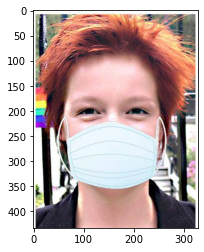

In [ ]:
#look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [ ]:
#Create instance of pretrained model
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE+[3],
    weights='imagenet',
    include_top=False
)

In [ ]:
#freeze pretrained model weights
ptm.trainable = False

In [ ]:
#map the data into feature vectors
#Keras image data generator returns classes one-hot encoded
K = len(folders) #number of classes
x =  Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [ ]:
#create a model object
model = Model(inputs=ptm.input, outputs=x)

In [ ]:
#Structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [ ]:
#Create intance of ImageDataGenerator
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

In [ ]:
batch_size = 128

#create generators
train_generators = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)
valid_generators = gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size
)

Found 816 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#Fit model
r = model.fit_generator(train_generators, validation_data=valid_generators, epochs=10, steps_per_epoch=int(np.ceil(len(image_files)/batch_size)), validation_steps=int(np.ceil(len(valid_image_files)/batch_size)))

Epoch 1/10
7/7 [==============================] - 526s 75s/step - loss: 0.9638 - accuracy: 0.8909 - val_loss: 0.1969 - val_accuracy: 0.9625
Epoch 2/10
7/7 [==============================] - 508s 73s/step - loss: 0.2364 - accuracy: 0.9804 - val_loss: 0.2035 - val_accuracy: 0.9786
Epoch 3/10
3/7 [===========>..................] - ETA: 1:26 - loss: 0.1210 - accuracy: 0.9868

KeyboardInterrupt: ignored

In [ ]:
model.save('transfer_learing_data_agumentation_new')

OSError: ignored

In [ ]:
val_image = image.load_img('/practice/custom object detector/dataset/agumented/with_mask/augmented_image_151.jpg', target_size=(200, 200))
print(val_image.size)
val_image = np.expand_dims(val_image, axis=0) # image shape is (1, 12, 12, 3)
y_proba = model.predict(val_image)
result = np.argmax(y_proba, axis=1)[0]
print(result)

(200, 200)
0
